<a href="https://colab.research.google.com/github/SonalDhoke/Programming_with_Data_Analysis_PY/blob/main/st20336540_CMP7005_PDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

---



**Overview**

Apart from land and water, air is the most important resource for life.Thus Air pollution remains one of the most persistent environmental challenges in India and monitoring Air Quality Index (AQI) trends is very essential for understanding its impact on public health and urban sustainability.

With various technological advancements, a vast amount of data on ambient air quality is generated and used to establish the quality of air in different areas.

**What is Air Quality Index and why it's needed ?**

Air quality can be described by measuring the levels of different pollutants in the air. But as the number of pollutants and monitoring stations increases, the information becomes difficult to understand—even for scientists. For the general public, looking at raw pollution data, graphs, or detailed reports can be confusing and unhelpful. Because of this, people may lose interest and not fully understand how good or bad the air quality is, or what actions the government is taking to control pollution.

However, it is important for everyone, especially people with health issues, to know the daily air pollution levels in a simple and clear way. A well-informed public is also more likely to support actions and policies that help improve air quality.

To make air quality easy to understand, many countries developed the Air Quality Index (AQI). AQI turns complex pollution measurements into a single number and category (like “Good,” “Moderate,” or “Poor”), making it easier for people to quickly understand the state of the air and take necessary precautions. This system has been used effectively around the world for more than 30 years.

**What this Dataset is about ?**

This dataset help us to analyze and understand the patterns,the problems related to Air Quality, how it is measured and its impact.This dataset examines a multy-city AQI spanning from January 2015 to Juky 2020, providing a five and a half year view of air quality conditions across india. The dataset captures daily AQI observations from 28 major cities.
By analyzing this dataset, we are aiming to identify temporal trends, seasonal behaviors, and spatial differences in air quality across India.Through programming and data analytics tools, this project transforms raw AQI data into meaningful insights that can support environmental assessment and policy discussions.

**Importing Required Libraries for Analysis**

In [ ]:
# importing the necessary libraries for data analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

**Connecting to Google Drive**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path ='/content/drive/MyDrive/Colab/Programming_DA/PDA_Assessment/Assessment Data-20251118'

**Combining all the CSV files in the drive path:**

All the files in the folder are checked one by one, and the ones that are with CSV extension that files are selected. Each CSV file is loaded into a Pandas DataFrame and stored in a list. After loading all the files, the DataFrames in the list are joined together using pd.concat() to create one complete DataFrame. This gives us a single dataset that contains all the data from the individual CSV files.

In [ ]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [ ]:
df = pd.concat(dataframes, ignore_index=True)
df

City        Date   PM2.5    PM10    NO    NO2    NOx   NH3  \
0      Brajrajnagar  07/12/2017  171.38  311.68   NaN  41.07    NaN  7.78   
1      Brajrajnagar  08/12/2017  126.67  192.81   NaN  20.16    NaN  7.97   
2      Brajrajnagar  09/12/2017  105.11  154.39   NaN  18.40    NaN  8.15   
3      Brajrajnagar  10/12/2017   65.25   99.73   NaN  15.21    NaN  7.90   
4      Brajrajnagar  11/12/2017     NaN     NaN   NaN    NaN    NaN   NaN   
...             ...         ...     ...     ...   ...    ...    ...   ...   
29526     Ahmedabad  27/06/2020   62.12  118.67  9.18  56.35  19.86   NaN   
29527     Ahmedabad  28/06/2020   31.57     NaN  6.37  23.99  16.40   NaN   
29528     Ahmedabad  29/06/2020   29.75  127.98  9.06  25.15  18.92   NaN   
29529     Ahmedabad  30/06/2020   40.02  121.10  7.09  58.92  33.41   NaN   
29530     Ahmedabad  01/07/2020   37.63     NaN  4.42  35.04  20.17   NaN   

         CO    SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0      3.26   5.83   4.69     0.00      NaN     NaN    NaN           NaN  
1      2.94   5.43  10.51     0.00      NaN     NaN  304.0     Very Poor  
2      2.83   5.10  10.33     0.00      NaN     NaN  291.0          Poor  
3      2.74   4.75   8.37     0.00      NaN     NaN  189.0      Moderate  
4       NaN    NaN    NaN      NaN      NaN     NaN    NaN           NaN  
...     ...    ...    ...      ...      ...     ...    ...           ...  
29526  0.49  12.44  68.05     1.32    37.76    1.62   92.0  Satisfactory  
29527  0.52  11.01  26.34     1.37    49.58    1.34   82.0  Satisfactory  
29528  0.67  12.10  34.99     1.39    60.21    0.79   74.0  Satisfactory  
29529  0.73  16.39  41.64     1.21    44.10    1.35   98.0  Satisfactory  
29530  0.28  14.40   9.69     1.73    47.05    1.87  119.0      Moderate  

[29531 rows x 16 columns]

**Basic Data Understanding:**

To understand my dataset,I've checked the columns and their data types. Also reviewed the descriptive statistics and identified ant missing values.I've used a heatmap to visualize where the missing data occurs,making it easier to see the patterns.This information will guide the preprocessing steps later on.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.head()

City        Date   PM2.5    PM10  NO    NO2  NOx   NH3    CO   SO2  \
0  Brajrajnagar  07/12/2017  171.38  311.68 NaN  41.07  NaN  7.78  3.26  5.83   
1  Brajrajnagar  08/12/2017  126.67  192.81 NaN  20.16  NaN  7.97  2.94  5.43   
2  Brajrajnagar  09/12/2017  105.11  154.39 NaN  18.40  NaN  8.15  2.83  5.10   
3  Brajrajnagar  10/12/2017   65.25   99.73 NaN  15.21  NaN  7.90  2.74  4.75   
4  Brajrajnagar  11/12/2017     NaN     NaN NaN    NaN  NaN   NaN   NaN   NaN   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0   4.69      0.0      NaN     NaN    NaN        NaN  
1  10.51      0.0      NaN     NaN  304.0  Very Poor  
2  10.33      0.0      NaN     NaN  291.0       Poor  
3   8.37      0.0      NaN     NaN  189.0   Moderate  
4    NaN      NaN      NaN     NaN    NaN        NaN

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

**Description of dataset columns:**


* City – Name of the city where the air quality was measured
* Date – The specific day on which the readings were recorded.
* PM2.5 – Fine particulate matter smaller than 2.5 micrometers, harmful as it can enter the lungs.
* PM10 – Particulate matter smaller than 10 micrometers, mainly dust and smoke.
* NO – Nitric oxide, a gas produced mainly from vehicle and industrial emissions.
* NO2 – Nitrogen dioxide, a toxic gas that contributes to smog and respiratory problems.
* NOx – A group of nitrogen oxides (NO + NO2) commonly used to track pollution from combustion sources.
* NH3 – Ammonia, mainly released from agriculture and waste, contributing to particulate pollution.
* CO – Carbon monoxide, a colorless gas from incomplete combustion, harmful when inhaled.
* SO2 – Sulfur dioxide, a gas from burning fossil fuels, causing irritation and acid rain.
* O3 – Ozone at ground level, a harmful pollutant formed by chemical reactions in sunlight.
* Benzene – A toxic volatile organic compound (VOC) often released from vehicles and industries.
* Toluene – A VOC found in solvents and fuels, contributing to air pollution.
* Xylene – Another VOC from industrial activity and traffic emissions.
* AQI – Air Quality Index, a single value that shows how clean or polluted the air is.
* AQI_Bucket – Category describing air quality (e.g., Good, Moderate, Poor) based on the AQI value



This structure is consistent across the files, with each file representing data from a different monitoring station.

In [ ]:
df.tail(5)

City        Date  PM2.5    PM10    NO    NO2    NOx  NH3    CO  \
29526  Ahmedabad  27/06/2020  62.12  118.67  9.18  56.35  19.86  NaN  0.49   
29527  Ahmedabad  28/06/2020  31.57     NaN  6.37  23.99  16.40  NaN  0.52   
29528  Ahmedabad  29/06/2020  29.75  127.98  9.06  25.15  18.92  NaN  0.67   
29529  Ahmedabad  30/06/2020  40.02  121.10  7.09  58.92  33.41  NaN  0.73   
29530  Ahmedabad  01/07/2020  37.63     NaN  4.42  35.04  20.17  NaN  0.28   

         SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
29526  12.44  68.05     1.32    37.76    1.62   92.0  Satisfactory  
29527  11.01  26.34     1.37    49.58    1.34   82.0  Satisfactory  
29528  12.10  34.99     1.39    60.21    0.79   74.0  Satisfactory  
29529  16.39  41.64     1.21    44.10    1.35   98.0  Satisfactory  
29530  14.40   9.69     1.73    47.05    1.87  119.0      Moderate

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.shape

(29531, 16)

# **Inference :**


---


The dataset contains 29,531 records with 16 columns, and while the City and Date columns are fully complete, several pollutant measurements show missing data. Key pollutants such as PM2.5, PM10, NH3, Toluene, and Xylene have a significant number of missing values, with Xylene having the least completeness. Other pollutants, including NO, NO2, NOx, SO2, O3, CO, and Benzene, also show moderate gaps but are more complete in comparison. The AQI and AQI_Bucket columns have some missing entries as well, which may affect overall air quality classification. Overall, the dataset is usable but will require proper handling of missing values—such as imputation or filtering—before performing deeper analysis.

In [ ]:
City = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(City)}')
City

Total number of cities in the dataset : 26


City
Lucknow               2009
Chennai               2009
Bengaluru             2009
Mumbai                2009
Delhi                 2009
Ahmedabad             2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: count, dtype: int64

In [ ]:
df['City'].unique()

array(['Brajrajnagar', 'Visakhapatnam', 'Thiruvananthapuram', 'Gurugram',
       'Kochi', 'Lucknow', 'Amritsar', 'Coimbatore', 'Ernakulam',
       'Amaravati', 'Chennai', 'Kolkata', 'Shillong', 'Delhi',
       'Bengaluru', 'Aizawl', 'Patna', 'Mumbai', 'Jorapokhar',
       'Chandigarh', 'Jaipur', 'Hyderabad', 'Talcher', 'Guwahati',
       'Bhopal', 'Ahmedabad'], dtype=object)

In [ ]:
print(f"There are  {df.duplicated().sum()} duplicates in the dataset")

There are  0 duplicates in the dataset


# **Inference:**


---

***Data Understanding***
*  **Dataset Structure** : The dataset contains 29,531 rows and 16 columns.It includes pollutant measurements, city names, dates, AQI values, and AQI categories.

   There are mainly two types of columns,i.e. Categorical and Numerical.

   *Categorical columns:*  City, Date, AQI_Bucket.(3 Columns)

   *Numerical columns:*   All pollutant concentrations and AQI.(13 columns)

* **Data Completeness** : The column City and Date have no missing values.
The pollutants show varying levels of missing data:

    *Least missing:* CO, NO, NO2, NOx, SO2, O3, Benzene

    *Moderate missing:* PM2.5, PM10, NH3, Toluene,  AQI, AQI_Bucket

    *Most missing:* Xylene


**Displaying the percentage of missing value**

In [ ]:
#checking Missing values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Greens'))


In [ ]:
missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-410150535.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())


City  Date  PM2.5  PM10    NO   NO2   NOx   NH3   CO  \
City                                                                       
Ahmedabad              0     0    628  1602   609   608   594  2009  609   
Aizawl                 0     0      2     1     0     0     0     0    0   
Amaravati              0     0     59    55    55    55    55    55   97   
Amritsar               0     0    128    63    93    44   289    42   76   
Bengaluru              0     0    146   360     6     6     4   203   11   
Bhopal                 0     0      9     9     9     9     9     9    9   
Brajrajnagar           0     0    185   173   243   234   175   226  150   
Chandigarh             0     0     15     0     4     4     4    10    0   
Chennai                0     0    117  1707    36    36    36   462   25   
Coimbatore             0     0      8     7    55    11     4   123    3   
Delhi                  0     0      2    77     2     2     0     9    0   
Ernakulam              0     0      4     4     4    55     4     4    4   
Gurugram               0     0    154   939   138   136   452  1560  109   
Guwahati               0     0      1     0     1     1     1     1    1   
Hyderabad              0     0    115   355    28    28     7   360    5   
Jaipur                 0     0     12    14    16    14   112    15    7   
Jorapokhar             0     0    790   275   270   270  1169   368  513   
Kochi                  0     0      0     0     2     6     0    16    0   
Kolkata                0     0     55    55    26    25     1     0    0   
Lucknow                0     0    102  2009    24    24   324  1004   28   
Mumbai                 0     0   1225  1246  1242  1253   499  1614   25   
Patna                  0     0    321  1667   203   204   203  1667  151   
Shillong               0     0     64    69    59    59    33    59   33   
Talcher                0     0    184   179   200   222   156   186  148   
Thiruvananthapuram     0     0     42    38    31    31    16   113   16   
Visakhapatnam          0     0    230   236   226   248    38   213   39   

                     SO2    O3  Benzene  Toluene  Xylene   AQI  AQI_Bucket  
City                                                                        
Ahmedabad            640   685      483      483     484   675         675  
Aizawl                 0     9       15       15     113     2           2  
Amaravati             65    55       75       75     269   110         110  
Amritsar             168   115      195      212     213    95          95  
Bengaluru              6   144      266       93    2009    99          99  
Bhopal                 9     9      289      289     289    11          11  
Brajrajnagar         193   203      173      938     938   225         225  
Chandigarh             0     0        0        0       0     5           5  
Chennai               36    49      285      253    2009   125         125  
Coimbatore             3     3        3        3     386    42          42  
Delhi                110    84        0        0     781    10          10  
Ernakulam              4   162        4        4       4     9           9  
Gurugram             175   116      442      610    1560   226         226  
Guwahati               1     1        7      502     502     7           7  
Hyderabad             26    26      127      127     127   126         126  
Jaipur                12    15       22       23    1114    20          20  
Jorapokhar           351   294     1169     1169    1169   398         398  
Kochi                  0     0      162        0     162     4           4  
Kolkata               62    50        1        1     420    60          60  
Lucknow               64    27       99      136    2009   116         116  
Mumbai              1220  1212      210      993     994  1234        1234  
Patna                205   278      172      173     172   399         399  
Shillong              54    56       33    

# **Inference:**


---

The table shows that missing data is unevenly distributed across cities and pollutants.  
* The City and Date columns have no missing values—ensuring complete spatial and temporal coverage—the pollutant measurements vary greatly in completeness across locations.
* Highly inconsistent pollutants such as **Xylene, PM10, NH3, Toluene, and Benzene** show large gaps in many cities, especially in places like Bengaluru, Chennai, Jorapokhar, Lucknow, and Mumbai, suggesting irregular monitoring, sensor downtime, or missing data transmission during certain periods.
* In contrast, gases like  **NO, NO2, NOx, SO2, and CO** exhibit relatively fewer missing entries across most cities, indicating more stable measurement practices for these pollutants.
* **AQI and AQI_Bucket** also show missingness patterns that correspond directly with gaps in pollutant values, since they rely on these measurements for calculation.
* Overall, the dataset provides strong temporal coverage across all cities, but pollutant monitoring is inconsistent—particularly for volatile organic compounds (VOC) i.e., Benzene,Toluene,Xylene and particulate matter—which will require careful cleaning or imputation before performing reliable air quality comparisons or trend analysis.

In [ ]:
print("Total missing values per Cities:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per Cities:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2206697564.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


# **Inference:**


---
The number of missing values varies widely across cities, showing that data completeness is not uniform.
* Some cities—such as **Mumbai, Ahmedabad, Jorapokhar, Gurugram, Lucknow, and Patna**—have a high number of missing entries, indicating inconsistent pollutant monitoring or long periods of missing recordings.
* In contrast, cities like **Chandigarh, Kochi, Aizawl, Coimbatore, and Ernakulam** have very few missing values, meaning their data is more complete and reliable.
* Most other cities fall somewhere in between, with moderate levels of missing data.
* Overall, the dataset covers all cities consistently in terms of dates, but the quality of pollutant measurements differs from city to city, and cities with large gaps.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
# Make a copy of original data BEFORE any cleaning
df_raw = df.copy()

# **Handling Missing Values**

**Xylene** was removed from the dataset because it had more than **60%** missing values across cities. With such a large portion of data unavailable, any attempt to fill in the gaps would be mostly guesswork and could introduce bias into the analysis. Dropping the Xylene column helps maintain the reliability and accuracy of the remaining dataset for further processing and modeling.

“As shown by Hua et al. (2024), high missing data rates (> 50%) degrade the reliability of air-quality analyses after mean/median imputation.” “More advanced imputation (deep-learning, spectral methods) may recover missing values — but require strong assumptions about data patterns and sufficient auxiliary information (other pollutants, meteorology, spatial correlation).”

**Research Paper Reference** : https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0306303

In [ ]:
df = df.drop(columns=["Xylene"])

# **Methods Used for handling missing values :**


---


To ensure the dataset remained accurate and suitable for time-series analysis, **different imputation strategies were applied based on the behavior and characteristics of each pollutant.** Instead of using simple mean or median filling—which can distort trends in time-dependent data—the methods were chosen to preserve natural temporal patterns, seasonal variation, and chemical consistency.
**Time-based interpolation** was used for pollutants with strong hourly fluctuations, **monthly medians** were applied where longer-term trends were more stable, and chemically related gases were balanced using known **scientific relationships**.

These approaches help maintain realistic pollutant dynamics and produce cleaner, more reliable data for further analysis.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(["City", "Date"])

cols_to_interp = ["PM2.5", "PM10", "CO"]

def interpolate_city(group):
    group = group.set_index("Date") #temporary index creation
    for col in cols_to_interp:
        group[col] = group[col].interpolate(
            method="time",
            limit=3,          # fill small gaps
            limit_direction="both"
        )
    return group.reset_index()

df = df.groupby("City", group_keys=False).apply(interpolate_city)
print(df[cols_to_interp].isna().sum())


PM2.5     3869
PM10     10368
CO        1238
dtype: int64


/tmp/ipython-input-257547496.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("City", group_keys=False).apply(interpolate_city)


In [ ]:
# Sort by Date only
df = df.sort_values("Date")

def interpolate_date(df):
    df2 = df.set_index("Date")
    for col in cols_to_interp:
        df2[col] = df2[col].interpolate(
            method="time",
            limit_direction="both"
        )
    return df2.reset_index()

df = interpolate_date(df)
print(df[cols_to_interp].isna().sum())


PM2.5    0
PM10     0
CO       0
dtype: int64


# **Inference :**


---

For key pollutants like **PM2.5, PM10, and CO**, **time-based interpolation** was applied using both **city + date** as the primary method and **date-based interpolation** with a small limit as a fallback. This approach fills gaps by estimating values from nearby timestamps within the same city, preserving the natural temporal flow of pollutant concentrations.

As a result, these columns now have complete and smoothly aligned values without distorting underlying patterns.


In [ ]:
df['Month'] = df['Date'].dt.month

# Columns to fill with monthly median
cols_to_fill = ["SO2", "NH3", "Benzene", "Toluene","O3"]

for col in cols_to_fill:
    if col in df.columns:
        df[col] = df[col].round(2)
        df[col] = df.groupby(['Month'])[col].transform(lambda x: x.fillna(x.median()))
        print(f"Monthly median filled: {col}")

# Check remaining missing
print(df[cols_to_fill].isna().sum())

Monthly median filled: SO2
Monthly median filled: NH3
Monthly median filled: Benzene
Monthly median filled: Toluene
Monthly median filled: O3
SO2        0
NH3        0
Benzene    0
Toluene    0
O3         0
dtype: int64


# **Inference:**


---
For pollutants such as **SO₂, NH₃, Benzene, Toluene, and O₃**,**monthly median** imputation was used because these pollutants often exhibit longer-term variability rather than rapid hourly fluctuations.

 Monthly medians capture seasonal behavior and typical concentration levels for that month, making them more reliable than standard imputation techniques.



In [ ]:


# List of columns
cols = ['NO', 'NO2', 'NOx']

# Single-pass loop
for col in cols:
    # Fill using chemical relationship --> NO + NO2 = NOx
    if col == 'NO':
        df[col] = df[col].combine_first(df['NOx'] - df['NO2'])
    elif col == 'NO2':
        df[col] = df[col].combine_first(df['NOx'] - df['NO'])
    elif col == 'NOx':
        df[col] = df[col].combine_first(df['NO'] + df['NO2'])

    df[col] = df[col].round(2)
    # Fill any remaining missing with monthly median
    df[col] = df.groupby('Month')[col].transform(lambda x: x.fillna(x.median()))

# Check missing values
print(df[cols].isna().sum())


NO     0
NO2    0
NOx    0
dtype: int64


In [ ]:
(df[['NO', 'NO2', 'NOx']] < 0).sum()


NO      63
NO2    558
NOx      0
dtype: int64

In [ ]:
No_pollutants = ['NO', 'NO2', 'NOx']  # Add others if needed

for col in No_pollutants:
    # Step 1: Identify negative values and convert them to NaN
    df.loc[df[col] < 0, col] = np.nan

    # Step 2: Fill those NaNs using monthly median
    # Changed .apply() to .transform() to ensure index alignment
    df[col] = df.groupby(['Month'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
(df[['NO', 'NO2', 'NOx']] < 0).sum()

NO     0
NO2    0
NOx    0
dtype: int64

In [ ]:
df.isnull().sum()


Date             0
City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI           4681
AQI_Bucket    4681
Month            0
dtype: int64

# **Inference:**


---

For nitrogen compounds **(NO, NO₂, and NOx)**, a chemistry-based balancing method was used, leveraging the known relationship **NO + NO₂ = NOx**. This ensures scientific consistency in the dataset and prevents unrealistic combinations of nitrogen oxide values.

**Research Paper Reference** :

https://www.sciencedirect.com/science/article/abs/pii/S1352231022006276

https://envs.au.dk/en/research-areas/air-pollution-emissions-and-effects/the-monitoring-program/measuring-methods/nitrogen-oxides-nox-no

In [ ]:

# CPCB breakpoints

pm25_breakpoints = [
    (0,   30,   0,   50),
    (31,  60,  51,  100),
    (61,  90, 101,  200),
    (91, 120, 201,  300),
    (121,250, 301,  400),
    (251,500, 401,  500),  # extended severe
]

pm10_breakpoints = [
    (0,    50,  0,   50),
    (51,  100, 51,  100),
    (101, 250,101,  200),
    (251, 350,201,  300),
    (351, 430,301,  400),
    (431,1000,401,  500),  # extended severe
]


def sub_index(conc, bps):
    """
    conc: integer (after rounding)
    bps: list of breakpoints
    """
    if pd.isna(conc):
        return None

    for low, high, i_low, i_high in bps:
        if low <= conc <= high:
            return (i_high - i_low) * (conc - low) / (high - low) + i_low

    return None  # for impossible out-of-range values


# ---------------------------------------
# 3. ROUND concentrations BEFORE applying breakpoints (CPCB rule)
"""✔ Document 1 – CPCB Final AQI Report

https://cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvRklOQUwtUkVQT1JUX0FRSV8ucGRm
Page 17 → Section 4.1: “Rounding of data”
It states:
“Concentrations should be rounded to the nearest integer before computing sub-index.”"""
# ---------------------------------------

df['PM2.5_round'] = df['PM2.5'].round().astype("Int64")
df['PM10_round']  = df['PM10'].round().astype("Int64")


# ---------------------------------------
# 4. Compute sub-indices
# ---------------------------------------

df['PM2.5_sub'] = df['PM2.5_round'].apply(lambda x: sub_index(x, pm25_breakpoints))
df['PM10_sub']  = df['PM10_round'].apply(lambda x: sub_index(x, pm10_breakpoints))


# ---------------------------------------
# 5. AQI = max of available sub-indices
# ---------------------------------------

df['AQI_recalc'] = df[['PM2.5_sub', 'PM10_sub']].max(axis=1).round().astype('Int64')


# ---------------------------------------
# 6. Assign AQI Bucket (CPCB categories)
# ---------------------------------------

def aqi_bucket_cpcb(aqi):
    if pd.isna(aqi):
        return None
    a = float(aqi)
    if a <= 50:
        return "Good"
    elif a <= 100:
        return "Satisfactory"
    elif a <= 200:
        return "Moderate"
    elif a <= 300:
        return "Poor"
    elif a <= 400:
        return "Very Poor"
    else:
        return "Severe"

df['AQI_Bucket_recalc'] = df['AQI_recalc'].apply(aqi_bucket_cpcb)




In [ ]:
#dropping temporary columns
df = df.drop(columns=[
    'PM2.5_round',
    'PM10_round',
    'PM2.5_sub',
    'PM10_sub'
])


# **Inference:**


---

* Recalculating **AQI and AQI_Bucket** from the cleaned pollutant data is a more reliable approach than trying to fill their missing values directly.
* AQI is derived from multiple pollutants, and its accuracy depends on the correctness of each pollutant’s concentration.

 **Why not fill directly?**
* If AQI were simply imputed with mean or median values, it would break the link between AQI and the underlying pollutants, leading to inconsistent or misleading results.
* By recomputing AQI after properly handling missing pollutant values, the index remains scientifically valid and fully aligned with the updated dataset.

 This ensures that the AQI categories (AQI_Bucket) also reflect real pollution levels rather than approximations, providing a cleaner and more trustworthy dataset for analysis and modeling.

 **Research Paper Reference:**

 https://mausam.imd.gov.in/imd_latest/contents/pdf/emrc_sop.pdf

https://www.cpcb.gov.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvRklOQUwtUkVQT1JUX0FRSV8ucGRm


In [ ]:
df.isnull().sum()


Date                    0
City                    0
PM2.5                   0
PM10                    0
NO                      0
NO2                     0
NOx                     0
NH3                     0
CO                      0
SO2                     0
O3                      0
Benzene                 0
Toluene                 0
AQI                  4681
AQI_Bucket           4681
Month                   0
AQI_recalc              0
AQI_Bucket_recalc       0
dtype: int64

**Saving Cleaned Dataset**

In [ ]:
df.to_csv("AQI_cleaned_dataset.csv", index=False)
print(" Cleaned data saved to AQI_cleaned_dataset.csv")

 Cleaned data saved to AQI_cleaned_dataset.csv


In [ ]:
df.describe().T

count                           mean                  min  \
Date          29531  2018-05-14 05:40:15.807118080  2015-01-01 00:00:00   
PM2.5       29531.0                      69.806305                 0.04   
PM10        29531.0                     126.389607                 0.01   
NO          29531.0                      16.665176                 0.02   
NO2         29531.0                      28.321458                 0.01   
NOx         29531.0                      32.103435                  0.0   
NH3         29531.0                      20.695068                 0.01   
CO          29531.0                       2.215725                  0.0   
SO2         29531.0                      13.813322                 0.01   
O3          29531.0                        33.9495                 0.01   
Benzene     29531.0                        2.87069                  0.0   
Toluene     29531.0                       7.208592                  0.0   
AQI         24850.0                     166.463581                 13.0   
Month       29531.0                       6.267143                  1.0   
AQI_recalc  29531.0                     149.869425                  1.0   

                            25%                  50%                  75%  \
Date        2017-04-16 00:00:00  2018-08-05 00:00:00  2019-09-03 00:00:00   
PM2.5                    29.135                49.35               82.855   
PM10                     61.495                101.0              160.295   
NO                         6.21                 9.72                17.57   
NO2                       12.73                21.29                35.62   
NOx                      14.355                24.73                39.36   
NH3                       12.04                14.95               21.755   
CO                         0.49                 0.89                 1.44   
SO2                        6.09                9.075                13.81   
O3                        19.97                31.25                42.73   
Benzene                    0.24                 1.04                 2.42   
Toluene                    1.28                 2.82                 6.02   
AQI                        81.0                118.0                208.0   
Month                       3.0                  6.0                  9.0   
AQI_recalc                 71.0                112.0                200.0   

                            max         std  
Date        2020-07-01 00:00:00         NaN  
PM2.5                    949.99   69.101527  
PM10                     1000.0   95.028749  
NO                       390.68   21.561761  
NO2                      458.86   24.459761  
NOx                      557.92   30.067795  
NH3                      352.89   21.099503  
CO                       175.81    7.070528  
SO2                      193.86   17.016395  
O3                       257.73   20.349889  
Benzene                  455.03    14.25308  
Toluene                  454.85   17.218087  
AQI                      2049.0  140.696585  
Month                      12.0    3.431974  
AQI_recalc                500.0  106.952537

# **Inference:**

📊 **Summary Statistics — Interpretation**

📘 **count**

Most variables have 29,531 valid entries, meaning the dataset provides strong hourly coverage.
AQI has fewer entries (24,850) because the original dataset had missing pollutant values, which prevented AQI calculation.


---


📆 **Date** (Time period insight)

Earliest date: 2015-01-01

Latest date: 2020-07-01

Median date: around mid-2018

This confirms the dataset spans 5.5 years of air quality data across multiple Indian cities.


---


📈 **mean** (Average pollutant levels)

PM2.5 = 69.80 µg/m³ → Indicates generally poor/moderate air quality.

PM10 = 126.39 µg/m³ → Suggests frequent dust and coarse particle pollution.

NO₂ = 28.32 µg/m³ → Represents traffic-related emissions at moderate levels.

O₃ = 33.95 µg/m³ → Typical range for urban ozone concentrations.

CO = 2.21 mg/m³ → Mostly low but with occasional spikes.

Overall, the averages show pollution is consistently present, with particulate matter being the most dominant issue.


---


📉 **min and max**

PM2.5: 0.04 → 949.99

      Huge range → some extremely polluted periods or high event spikes.

PM10: 0.01 → 1000

      Indicates very polluted days in some cities.

NO₂: up to 458 and NOx: up to 557

      Suggests heavy traffic/industrial emission peaks.

O₃: max 257

      Shows strong photochemical activity on some days.

Benzene/Toluene max > 450

      These extremely high VOC (Volatile Organic Compounds) readings indicate occasional strong exposure events, likely industrial or fuel-related.

Interpretation:

      Pollutant values vary widely, with sharp spikes, showing episodes of severe pollution.


---



⚖️ **Quartiles** (25%, 50%, 75%)

Example: PM2.5

25% = 29 → Air was clean/moderate for 25% of the time.

50% (Median) = 49 → Half the time, PM2.5 stayed below 49 µg/m³.

75% = 82 → 75% of values below 82 means many moderately polluted days.

Overall, the quartile spread shows skewness toward higher pollution due to occasional severe events.


---



📊 **std** (Standard Deviation)

PM2.5 std = 69.10

PM10 std = 95.03

CO std = 7.07

VOC std values also very high

A high standard deviation indicates the values fluctuate greatly over time.
This matches real-world behavior — pollution varies significantly between seasons, cities, and events.



---


🟩 **AQI vs AQI_recalc**

Original AQI mean = 166.46 (moderate-poor)

Recalculated AQI mean = 149.86 (slightly lower)

The recalculated AQI is more consistent because it uses cleaned and interpolated pollutant data, making it more reliable than the original, which had missing and inconsistent values.



---


🌦️ **Overall Interpretation**

Particulate matter (PM2.5, PM10) shows consistently high averages and large variability, indicating major air pollution issues across the cities.

Gaseous pollutants (NO₂, NOx, O₃, CO) also show wide fluctuations, pointing to varying emissions, seasonal effects, and occasional severe spikes.

The dataset captures diverse pollution patterns from very clean periods to extremely polluted episodes.

The recalculated AQI provides a cleaner and more stable indicator of overall air quality.


# **Task Data Visualization**


---


In this Section, visualizations have been used to extract meaningful insights from the dataset. Key visualizations included:
*   A Heatmap will show the comparison between original data and cleaned data

* The bar chart will help us to visualize the highest number of severe AQI incidents (>200).

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Original data (before cleaning)
missing_raw = df_raw.isna().astype(int)

# Cleaned data (drop old AQI for visualization only)
df_clean_viz = df.copy()
df_clean_viz = df_clean_viz.drop(columns=['AQI', 'AQI_Bucket'], errors='ignore')

missing_cleaned = df_clean_viz.isna().astype(int)

# Transpose for heatmaps
missing_raw_T = missing_raw.T
missing_cleaned_T = missing_cleaned.T

# Subplots with spacing
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Missing Values - Original Data",
                    "Missing Values - Cleaned Data (Recalculated AQI)"),
    horizontal_spacing=0.25   # <--- ADD SPACE BETWEEN HEATMAPS
)

# Original heatmap
fig.add_trace(
    go.Heatmap(
        z=missing_raw_T.values,
        x=missing_raw_T.columns,
        y=missing_raw_T.index,
        colorscale=[[0, '#F28C28'], [1, '#AA336A']],  # green=present, red=missing
        colorbar=dict(title="Missing", x=0.46)  # position colorbar between plots
    ),
    row=1, col=1
)

# Cleaned heatmap
fig.add_trace(
    go.Heatmap(
        z=missing_cleaned_T.values,
        x=missing_cleaned_T.columns,
        y=missing_cleaned_T.index,
        colorscale=[[0, '#F28C28'], [1, '#AA336A']],
        showscale=False
    ),
    row=1, col=2
)

# Layout and formatting
fig.update_layout(
    height=650,
    width=1400,
    title_text="Comparison of Missing Values: Original vs Cleaned Data",
    xaxis1=dict(title='Row Index'),
    xaxis2=dict(title='Row Index'),
    yaxis1=dict(title='Columns'),
    yaxis2=dict(title='Columns'),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


The **heatmap** comparison shows that the original dataset had widespread missing values across many pollutants, but after cleaning and recalculating AQI, all missing values were successfully removed, resulting in a fully complete dataset.

# 🔹 Overall AQI and Pollutant Overview

  Below graphs provides a high-level understanding of AQI patterns and pollutant contributions across the dataset.

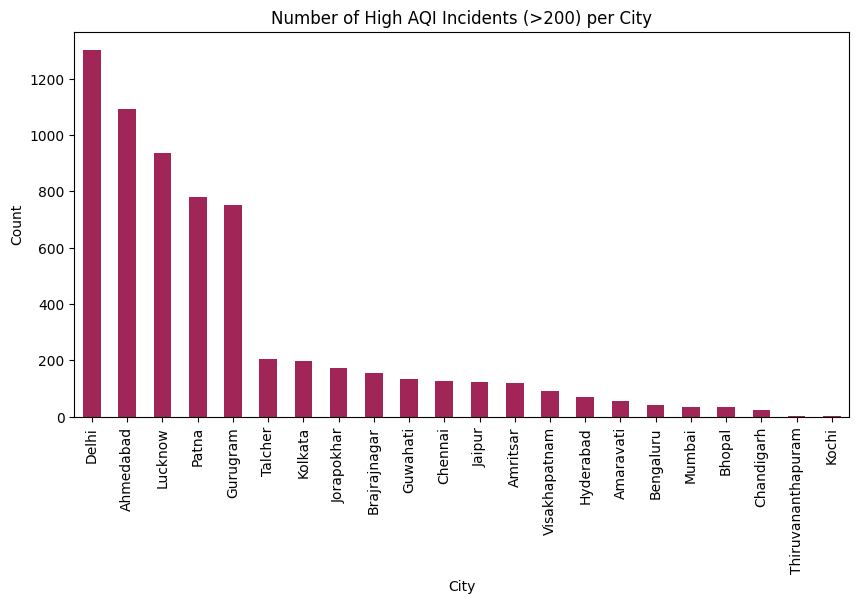

In [ ]:
high_aqi = df[df['AQI'] > 200]  # Poor or worse
plt.figure(figsize=(10,5))
high_aqi['City'].value_counts().plot(kind='bar', color='#A12557')
plt.title('Number of High AQI Incidents (>200) per City')
plt.ylabel('Count')
plt.show()

Delhi, Ahmedabad, and Lucknow show the highest number of severe AQI incidents (>200), indicating consistently poor air quality, while cities like Kochi, Thiruvananthapuram, and Chandigarh experience very few high-AQI days.

In [42]:
import plotly.express as px
import pandas as pd

# Ensure 'Date' is datetime and extract year
# 'Date' is already the DataFrame's index and is a DatetimeIndex.
# We can directly extract the year from the index.
df['Year'] = df['Date'].dt.year

# Pollutants to include in pie chart
# 'Xylene' was dropped earlier, so remove it from the list
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']

# Compute average pollutant values per year
yearly_avg = df.groupby('Year')[pollutants].mean().reset_index()

# Melt for Plotly
df_melt = yearly_avg.melt(id_vars='Year', value_vars=pollutants, var_name='Pollutant', value_name='Average')

# Initial year
initial_year = df_melt['Year'].min()
fig = px.pie(
df_melt[df_melt['Year'] == initial_year],
names='Pollutant',
values='Average',
title=f'Average Pollutant Concentration for Year {initial_year}'
)

# Dropdown buttons for each year
years = df_melt['Year'].unique()
buttons = []
for year in years:
  buttons.append(dict(
  label=str(year),
  method='update',
  args=[{'values': [df_melt[df_melt['Year']==year]['Average']],
  'labels': [df_melt[df_melt['Year']==year]['Pollutant']]},
  {'title': f'Average Pollutant Concentration for Year {year}'}]
  ))

# Update layout with fixed dropdown and instruction annotation
fig.update_layout(
updatemenus=[dict(
active=0,
buttons=buttons,
x=0.25,
y=1.1,
xanchor='left',
yanchor='top',
showactive=True,
direction='down',
pad={'r': 10, 't': 10},
bgcolor='lightgrey',
bordercolor='black',
borderwidth=1,
font=dict(color='black')
)],
annotations=[dict(
text="Select a Year:",
x=0.25,
y=1.030,
xref='paper',
yref='paper',
showarrow=False,
font=dict(size=14),
xanchor='right',
yanchor='middle'
)]
)

fig.show()

Across all years, PM10 and PM2.5 consistently dominate the pollutant mix, confirming that particulate matter remains the largest contributor to air pollution regardless of the year selected.

In [43]:
import plotly.express as px
import pandas as pd

# Select only pollutant columns
pollutants = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene"]

# Compute average contribution (or sum → both work)
pollution_sum = df[pollutants].sum().reset_index()
pollution_sum.columns = ["Pollutant", "Total_Contribution"]

# Create Treemap
fig = px.treemap(
    pollution_sum,
    path=["Pollutant"],
    values="Total_Contribution",
    color="Total_Contribution",
    color_continuous_scale="Reds",
    title="Pollutant Contribution to Overall Pollution Levels"
)

fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


The treemap clearly shows that PM10 and PM2.5 dominate overall pollution load across Indian cities, followed by nitrogen compounds (NO₂, NOx). Gaseous pollutants and VOCs (Volatile Organic Compounds) appear significantly smaller, indicating their smaller contribution compared to particulate matter.

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

# Calculate means
mean_pollutants = df[pollutants].mean()

# Convert to DataFrame for easy handling
df_mean = pd.DataFrame({
    'Pollutant': pollutants,
    'Average': mean_pollutants.values
})

# Identify highest & lowest
max_pollutant = df_mean['Average'].max()
min_pollutant = df_mean['Average'].min()

# Assign colors
colors = []
for val in df_mean['Average']:
    if val == max_pollutant:
        colors.append('#472566')
    elif val == min_pollutant:
        colors.append('#472566')
    else:
        colors.append('#E1CDFA')
# Plot
fig = px.bar(
    df_mean,
    x='Pollutant',
    y='Average',
    title='Average of Each Pollutant (Highest & Lowest Highlighted)'
)

# Apply custom colors
fig.update_traces(marker_color=colors)

fig.update_layout(
    template="simple_white",
    paper_bgcolor="#FAFAFA",
    plot_bgcolor="#FFFFFF",
    xaxis_title="Pollutant",
    yaxis_title="Average Concentration"
)

fig.show()


Among all pollutants, PM10 dominates with the highest average levels, highlighting it as the major contributor to air pollution, while pollutants like Benzene and NO remain comparatively low on average across the dataset.

In [41]:
import plotly.express as px
import pandas as pd

# Pollutant list
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
              'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

# Melt dataframe
df_melt = df.melt(
    value_vars=pollutants,
    var_name="Pollutant",
    value_name="Value"
)

# Violin plot (no box, no points)
fig = px.violin(
    df_melt,
    x="Pollutant",
    y="Value",
    color="Pollutant",
    box=False,        # remove box
    points=False,     # remove points/bubbles
    title="Distribution of Pollutants (Violin Plot)",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    template="simple_white",
    title_x=0.5,
    xaxis_title="Pollutant",
    yaxis_title="Concentration",
    paper_bgcolor="#FAFAFA",
    plot_bgcolor="#FFFFFF",
    showlegend=False,
    height=600
)

fig.show()


PM10 and PM2.5 show the widest and most skewed distributions with extreme high values, indicating frequent pollution spikes, while gases like CO, Benzene, and NO exhibit much narrower ranges and more stable concentrations.

In [ ]:


df['Month Name'] = df['Date'].dt.month_name()

def indian_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Summer'
    elif month in ['June','July','August','September']:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month Name'].apply(indian_season)


In [ ]:

# Order seasons manually if needed
season_order = ["Winter", "Post-Monsoon", "Summer", "Monsoon"]

# Average AQI per season
df_season = df.groupby("Season")["AQI_recalc"].mean().reset_index()

# Enforce ordering
df_season["Season"] = pd.Categorical(df_season["Season"], categories=season_order, ordered=True)
df_season = df_season.sort_values("Season")

# Pastel color
pastel_color = "#A6CEE3"

fig = px.line(
    df_season,
    x="Season",
    y="AQI_recalc",
    markers=True,
    title="Seasonal AQI Trend (Recalculated)",
    color_discrete_sequence=[pastel_color]
)

# Styling
fig.update_layout(
    template="simple_white",
    paper_bgcolor="#FAFAFA",
    plot_bgcolor="#FFFFFF",
    font=dict(color="#333333", size=13),
    title_x=0.5,
    xaxis_title="Season",
    yaxis_title="Average AQI (Recalculated)",
    xaxis=dict(
        tickfont=dict(size=14),
        gridcolor="#F0F0F0"
    ),
    yaxis=dict(
        gridcolor="#EDEDED"
    ),
)

fig.show()


In [ ]:

# Compute monthly averages
df_monthly = df.groupby("Month")[["AQI", "AQI_recalc"]].mean().reset_index()

# Percent Difference
df_monthly["Percent_Diff"] = ((df_monthly["AQI_recalc"] - df_monthly["AQI"]) / df_monthly["AQI"]) * 100


# ----------------------------------------------------------
# 2) CORRECT CATEGORY FUNCTION (Based ON Monthly AVERAGE)
# ----------------------------------------------------------

def categorize(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Satisfactory"
    elif aqi <= 200: return "Moderate"
    elif aqi <= 300: return "Poor"
    elif aqi <= 400: return "Very Poor"
    else: return "Severe"

df_monthly["AQI_Category"] = df_monthly["AQI"].apply(categorize)
df_monthly["AQI_recalc_Category"] = df_monthly["AQI_recalc"].apply(categorize)


# ----------------------------------------------------------
# 3) AQI CATEGORY SHADING
# ----------------------------------------------------------

bands = [
    ("Good", 0, 50, "rgba(0, 176, 80, 0.30)"),          # green
    ("Satisfactory", 51, 100, "rgba(255, 255, 0, 0.30)"),  # yellow
    ("Moderate", 101, 200, "rgba(255, 165, 0, 0.30)"),     # orange
    ("Poor", 201, 300, "rgba(255, 0, 0, 0.30)"),           # red
    ("Very Poor", 301, 400, "rgba(128, 0, 128, 0.30)"),    # purple
    ("Severe", 401, 500, "rgba(128, 64, 0, 0.30)")         # brown
]

fig = go.Figure()

# Add shaded background rectangles
for name, y0, y1, color in bands:
    fig.add_shape(
        type="rect",
        x0=1,
        x1=12,
        y0=y0,
        y1=y1,
        fillcolor=color,
        line=dict(width=0),
        layer="below"
    )


# ----------------------------------------------------------
# 4) LINES (AQI & AQI_recalc) WITH CORRECT TOOLTIP
# ----------------------------------------------------------

colors = ["#4E79A7", "#F28E2B"]  # pastel blue + pastel orange

for line_label, clr in zip(["AQI", "AQI_recalc"], colors):

    category_col = "AQI_Category" if line_label == "AQI" else "AQI_recalc_Category"

    fig.add_trace(go.Scatter(
        x=df_monthly["Month"],
        y=df_monthly[line_label],
        mode="lines+markers",
        name=line_label,
        line=dict(color=clr, width=3),
        marker=dict(size=9),

        # Tooltip fields: percent diff + correct categories
        customdata=df_monthly[["Percent_Diff", category_col]].values,

        hovertemplate=
        "<b>%{fullData.name}</b><br>" +
        "Month: %{x}<br>" +
        "AQI Value: %{y:.1f}<br>" +
        "Percent Difference: %{customdata[0]:.2f}%<br>" +
        "AQI Category: <b>%{customdata[1]}</b><extra></extra>"
    ))


# ----------------------------------------------------------
# 5) ADD LEGEND FOR SHADING BANDS
# ----------------------------------------------------------

for name, y0, y1, color in bands:
    fig.add_trace(go.Bar(
        x=[None], y=[None],
        name=f"{name} ({y0}-{y1})",
        marker=dict(color=color)
    ))


# ----------------------------------------------------------
# 6) LAYOUT – CLEAN PASTEL DASHBOARD
# ----------------------------------------------------------

fig.update_layout(
    title="Monthly Average AQI vs AQI_recalc<br><sup>With Correct Category Shading & Tooltip</sup>",
    title_x=0.5,

    template="simple_white",
    paper_bgcolor="#FAFAFA",
    plot_bgcolor="#FFFFFF",

    xaxis=dict(
        title="Month",
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        gridcolor="#DDDDDD",
        title_font=dict(size=15)
    ),

    yaxis=dict(
        title="AQI Level",
        gridcolor="#DDDDDD",
        range=[0, max(df_monthly["AQI"].max(), df_monthly["AQI_recalc"].max()) + 20],
        title_font=dict(size=15)
    ),

    legend=dict(
        title="AQI Categories & Lines",
        bgcolor="#FFFFFF",
        bordercolor="#CCCCCC",
        borderwidth=1
    ),

    margin=dict(t=140)
)

fig.show()
